In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
flights=pd.read_csv('ontime_per.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(flights.shape)
print(flights.head())

(445827, 110)
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2016        1      1           6          3  2016-01-06            AA   
1  2016        1      1           7          4  2016-01-07            AA   
2  2016        1      1           8          5  2016-01-08            AA   
3  2016        1      1           9          6  2016-01-09            AA   
4  2016        1      1          10          7  2016-01-10            AA   

   AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
0      19805      AA  N4YBAA      ...               NaN          NaN   
1      19805      AA  N434AA      ...               NaN          NaN   
2      19805      AA  N541AA      ...               NaN          NaN   
3      19805      AA  N489AA      ...               NaN          NaN   
4      19805      AA  N439AA      ...               NaN          NaN   

   Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0            NaN              

In [4]:
flights = flights[flights['Month'] == 1]
flights.shape


(445827, 110)

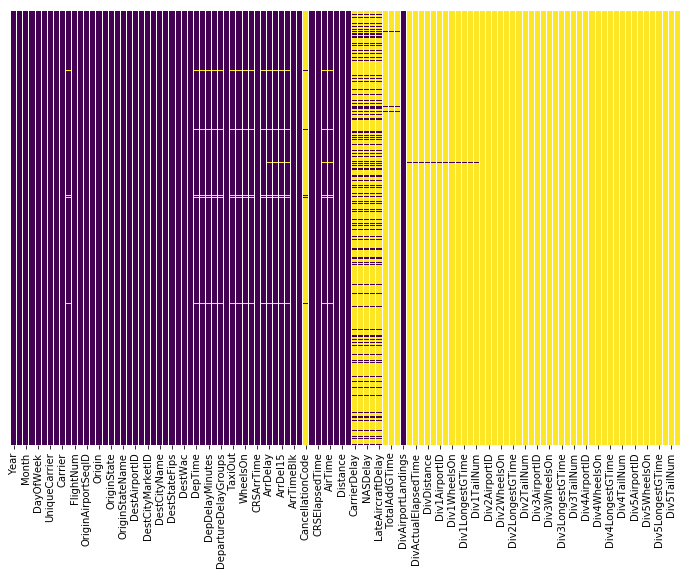

In [5]:
#yellow portion indicates missing values
plt.figure(figsize = (12, 8))
sns.heatmap(flights.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#i am dropping columns columns with 2/3rd of missing data
for i in flights.columns:
    if flights[i].isnull().sum() > 300000:
        flights.drop(i, axis = 1, inplace = True)

In [7]:
#columns like year which is constant is dropped
#i,e if no of unique elements is 1,drop those
for i in flights.columns:
    if flights[i].nunique() == 1:
        flights.drop(i, axis = 1, inplace = True)

In [8]:
#i took this code from kaggle which displays filling factor

missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights.shape[0]-missing_df['missing values'])/flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrDelay,12529,97.189717
1,AirTime,12529,97.189717
2,ActualElapsedTime,12529,97.189717
3,ArrDelayMinutes,12529,97.189717
4,ArrDel15,12529,97.189717
5,ArrivalDelayGroups,12529,97.189717
6,TaxiIn,11907,97.329233
7,ArrTime,11907,97.329233
8,WheelsOn,11907,97.329233
9,TaxiOut,11600,97.398094


In [9]:
#because the missing values are <3% drop those rows
flights.dropna(inplace = True)
flights.shape

(433298, 52)

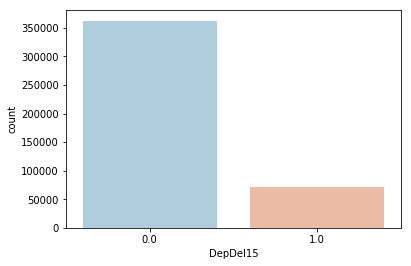

In [10]:
# i think graphs are clear and understandable
sns.countplot(x='DepDel15',data=flights,palette='RdBu_r')


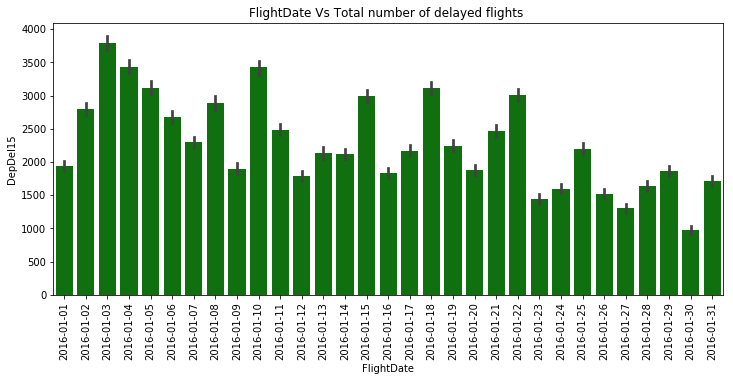

In [11]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='DepDel15', data=flights, color = "green" , order = order , estimator = np.sum)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

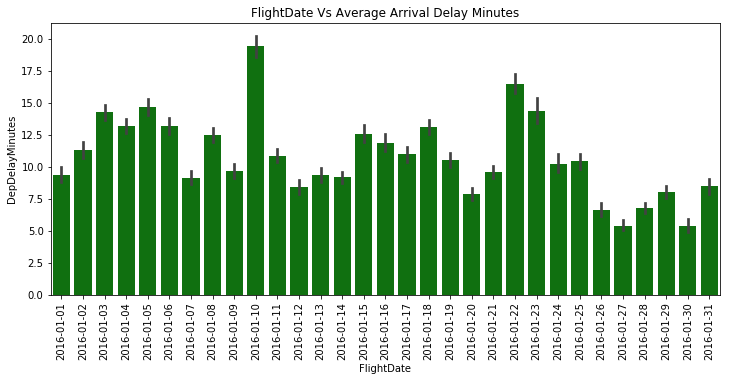

In [12]:
plt.figure(figsize=(12, 5))
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='DepDelayMinutes', data=flights, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Average Arrival Delay Minutes")

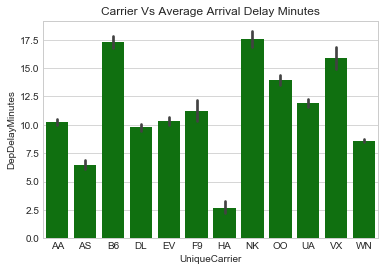

In [13]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(flights['UniqueCarrier']))
sns.barplot(x='UniqueCarrier',y ='DepDelayMinutes', data=flights, color = "green" , order = carrier_order,estimator=np.mean)
fig = plt.title("Carrier Vs Average dep delay min")

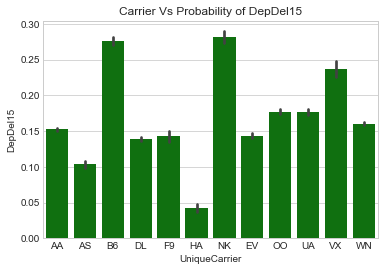

In [15]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="DepDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of DepDel15")

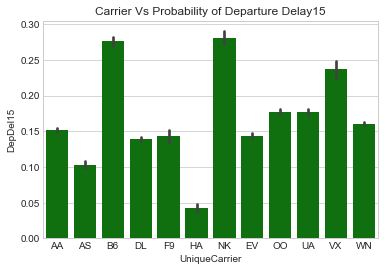

In [16]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="DepDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Departure Delay15")

In [17]:
#instead of have day number,i have converted it to categorical,for easy understanding
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
flights['Month'] = flights["DayofMonth"].apply(Impute_month)
flights.drop("DayofMonth", axis = 1, inplace = True)

In [18]:
#same logic as above
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
flights['Week'] = flights["DayOfWeek"].apply(Impute_week)
flights.drop("DayOfWeek", axis = 1, inplace = True)

In [19]:
flights.head()

,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,...,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,DivAirportLandings,Month,Week
0,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,155.0,132.0,986.0,4,0,weekI,Weekdays
1,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,150.0,126.0,986.0,4,0,weekI,Weekdays
2,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,170.0,135.0,986.0,4,0,weekII,Weekdays
3,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,151.0,129.0,986.0,4,0,weekII,Weekdays
4,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,171.0,137.0,986.0,4,0,weekII,Weekend


In [20]:

#exploring delays in different weeks of month
Month_grouped1 = flights.groupby('Month')["DepDel15"].sum()
Month_grouped2 = flights.groupby('Month')["DepDel15"].count()
print(Month_grouped1)
print(Month_grouped2)
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]
print(Month_grouped)

Month
weekI      20056.0
weekII     16733.0
weekIII    16695.0
weekIV     12704.0
weekV       4554.0
Name: DepDel15, dtype: float64
Month
weekI      102704
weekII      99710
weekIII     98771
weekIV      91579
weekV       40534
Name: DepDel15, dtype: int64
             sum   count  Average number of delays
Month                                             
weekI    20056.0  102704                  0.195280
weekII   16733.0   99710                  0.167817
weekIII  16695.0   98771                  0.169027
weekIV   12704.0   91579                  0.138722
weekV     4554.0   40534                  0.112350


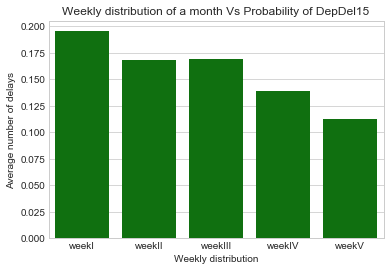

In [21]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of DepDel15")

In [22]:
#explore delays in weekdays and weekends
week_grouped1 = flights.groupby('Week')["DepDel15"].sum()
week_grouped2 = flights.groupby('Week')["DepDel15"].count()
print(week_grouped1)
print(week_grouped2)
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of DepDel15"] = week_grouped["sum"]/week_grouped["count"]
print(week_grouped)

Week
Weekdays    46822.0
Weekend     23920.0
Name: DepDel15, dtype: float64
Week
Weekdays    306020
Weekend     127278
Name: DepDel15, dtype: int64
              sum   count  Probability of DepDel15
Week                                              
Weekdays  46822.0  306020                 0.153003
Weekend   23920.0  127278                 0.187935


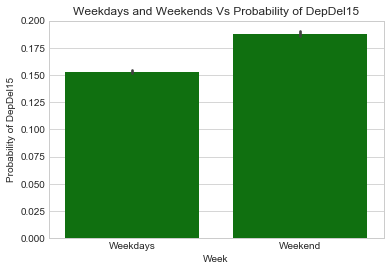

In [23]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Week, y ='DepDel15', data=flights, color ='green')
plt.ylabel("Probability of DepDel15")
fig = plt.title("Weekdays and Weekends Vs Probability of DepDel15")

In [24]:
#same logic as above but for orign airport
airport_grouped1 = flights.groupby('Origin')["DepDel15"].sum()
airport_grouped2 = flights.groupby('Origin')["DepDel15"].count()
airport_grouped = pd.concat([airport_grouped1, airport_grouped2],axis=1, keys=["sum", "count"])
airport_grouped["Probability of DepDel15"] = airport_grouped["sum"]/airport_grouped["count"]
airport_grouped.sort_values(by = "Probability of DepDel15", ascending = False, inplace = True)

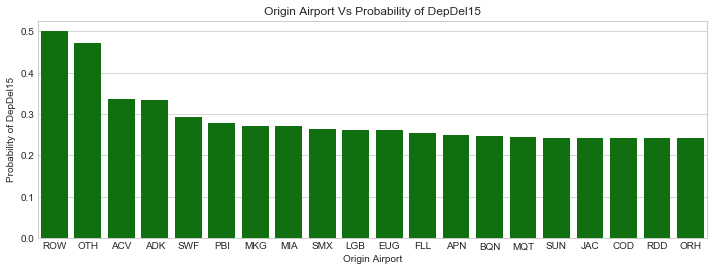

In [25]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped.index[:20], y = "Probability of DepDel15", data=airport_grouped[:20], color ='green')
plt.xlabel("Origin Airport")
plt.ylabel("Probability of DepDel15")
fig = plt.title("Origin Airport Vs Probability of DepDel15")

In [26]:
#for destination airport
airport_grouped3 = flights.groupby('Dest')["DepDel15"].sum()
airport_grouped4 = flights.groupby('Dest')["DepDel15"].count()
airport_grouped_dest = pd.concat([airport_grouped3, airport_grouped4],axis=1, keys=["sum", "count"])
airport_grouped_dest["Probability of DepDel15"] = airport_grouped_dest["sum"]/airport_grouped_dest["count"]
airport_grouped_dest.sort_values(by = "Probability of DepDel15", ascending = False, inplace = True)

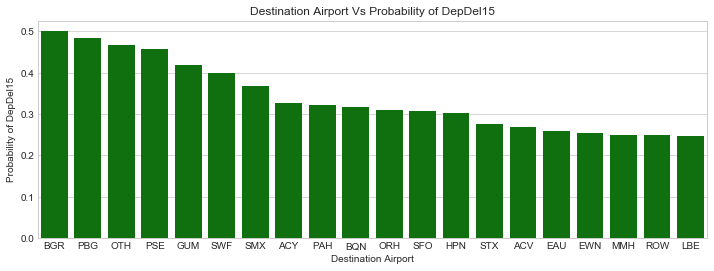

In [27]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped_dest.index[:20], y ='Probability of DepDel15', data=airport_grouped_dest[:20], color ='green')
plt.xlabel("Destination Airport")
plt.ylabel("Probability of DepDel15")
fig = plt.title("Destination Airport Vs Probability of DepDel15")

In [28]:
#creating new attribute like 'source' to 'dest'
flights["Flight_route"] = flights["Origin"] + " to " + flights["Dest"]
flightroute = flights.groupby('Flight_route').sum()
flightroute.sort_values(by = "DepDel15", axis = 0, ascending = False, inplace = True)

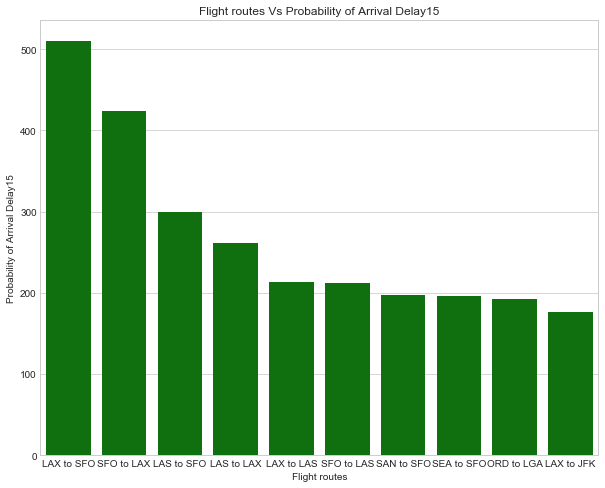

In [33]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ArrDel15", data=flightroute[:10], color ='green')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

In [30]:
#new attribut for visualization
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"
    
    
flights['Arrival_Time'] = flights["CRSArrTime"].apply(impute_time)
flights.drop("CRSArrTime", axis = 1, inplace = True)

In [31]:
#CRS time is like some computed time ,as we already have arrtime and deptime ,i think we dont need CRS time
flights['Departure_Time'] = flights["CRSDepTime"].apply(impute_time)
flights.drop("CRSDepTime", axis = 1, inplace = True)

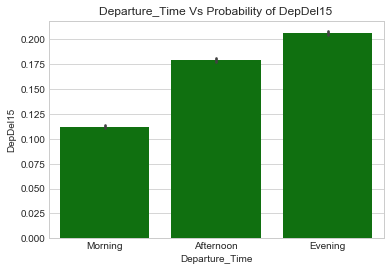

In [32]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Departure_Time, y ="DepDel15", data=flights, color ='green')
fig = plt.title("Departure_Time Vs Probability of DepDel15")

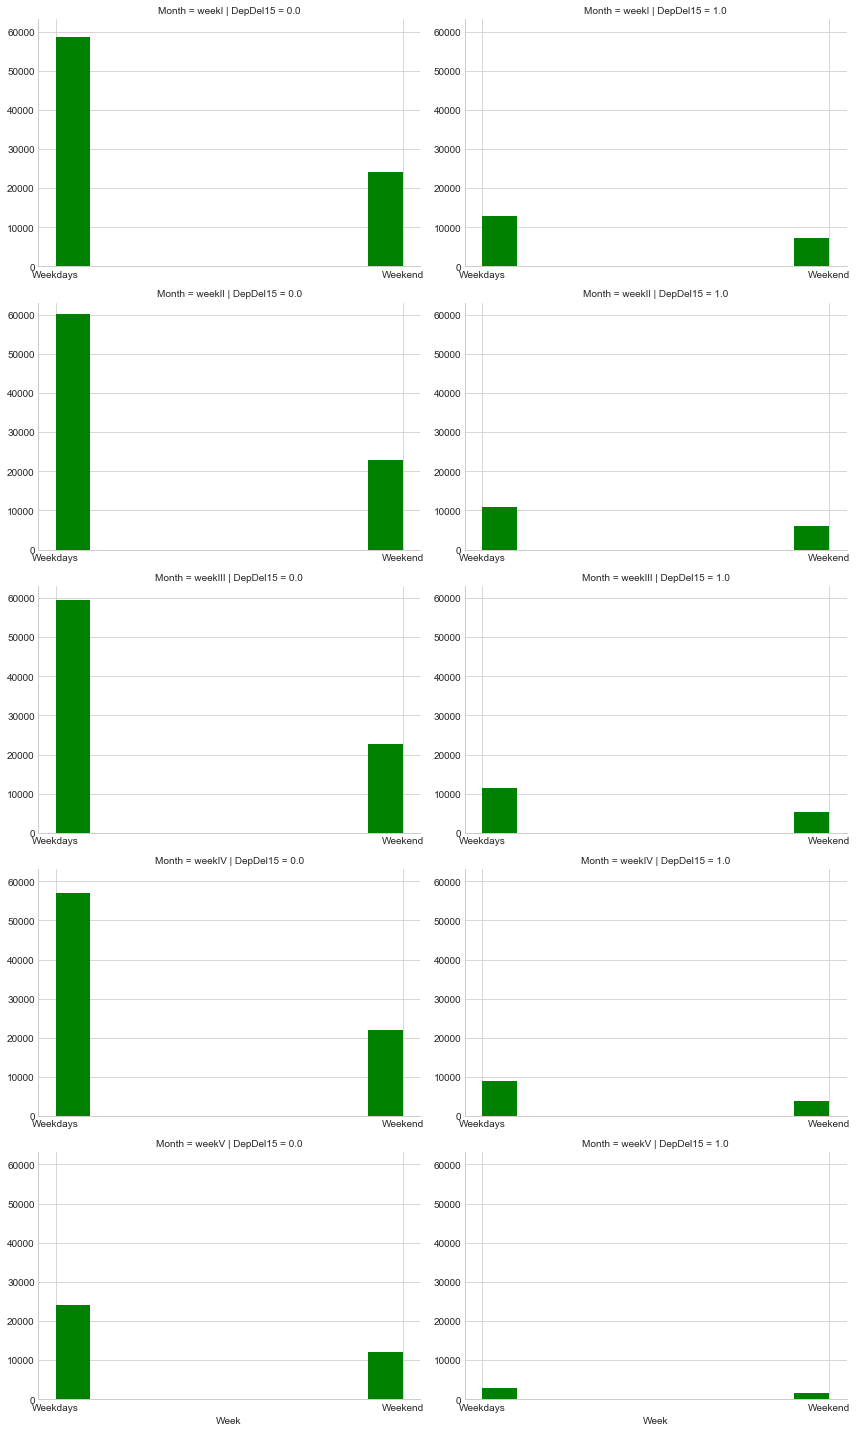

In [33]:
g=sns.FacetGrid(flights,col='DepDel15',row='Month',size=4,aspect=1.5)
fig=g.map(plt.hist,'Week',color='g')

In [34]:
flights.columns

Index(['FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'DivAirportLandings', 'Month', 'Week', 'Flight_route', 'Arrival_Time',
       'Departure_Time'],
      dtype='object')

In [35]:
#i think these attributs
df_clean_for_delay = flights.drop(['FlightDate', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'ArrDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Arrival_Time'], axis = 1)

In [36]:
print(df_clean_for_delay.shape)
df_clean_for_delay.columns

(433298, 10)


Index(['UniqueCarrier', 'Origin', 'DepDel15', 'TaxiOut', 'TaxiIn', 'AirTime',
       'Distance', 'Month', 'Week', 'Departure_Time'],
      dtype='object')

          DepDel15   TaxiOut    TaxiIn   AirTime  Distance
DepDel15  1.000000  0.053883 -0.011629  0.031608  0.035482
TaxiOut   0.053883  1.000000  0.007479  0.049890  0.037180
TaxiIn   -0.011629  0.007479  1.000000  0.101871  0.096430
AirTime   0.031608  0.049890  0.101871  1.000000  0.982208
Distance  0.035482  0.037180  0.096430  0.982208  1.000000


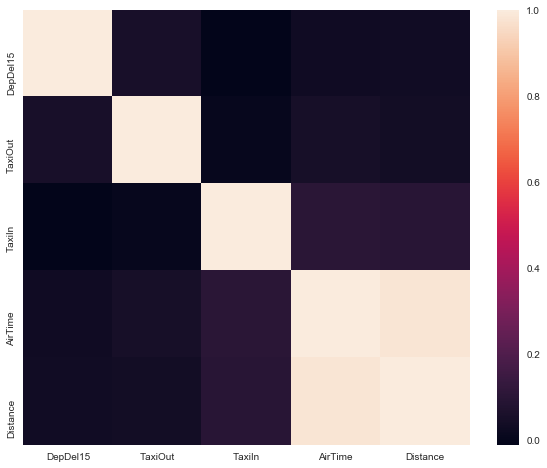

In [37]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [38]:
df_clean_for_delay.drop(["AirTime"], axis = 1, inplace = True)
#df_clean_for_delay.drop(["DepDelayMinutes"], axis = 1, inplace = True)


In [39]:
df_clean_for_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433298 entries, 0 to 445826
Data columns (total 9 columns):
UniqueCarrier     433298 non-null object
Origin            433298 non-null object
DepDel15          433298 non-null float64
TaxiOut           433298 non-null float64
TaxiIn            433298 non-null float64
Distance          433298 non-null float64
Month             433298 non-null object
Week              433298 non-null object
Departure_Time    433298 non-null object
dtypes: float64(4), object(5)
memory usage: 53.1+ MB


In [40]:
#print('flightdate-',len(df_clean_for_delay.FlightDate.unique()))
print('uniquecarrier',len(df_clean_for_delay.UniqueCarrier.unique()))
#print('carrier',len(df_clean_for_delay.Carrier.unique()))
print('origin',len(df_clean_for_delay.Origin.unique()))
print('month',len(df_clean_for_delay.Month.unique()))
print('week',len(df_clean_for_delay.Week.unique()))
#print('flghtroute',len(df_clean_for_delay.Flight_route.unique()))
print('Departure_Time',len(df_clean_for_delay.Departure_Time.unique()))

uniquecarrier 12
origin 294
month 5
week 2
Departure_Time 3


In [41]:
#print(df_clean_for_delay['Flight_route'].value_counts().sort_values(ascending=False).head(10))


In [42]:
#df_clean_for_delay.drop(["Flight_route"], axis = 1, inplace = True)
#df_clean_for_delay.drop(["FlightDate"], axis = 1, inplace = True)
#df_clean_for_delay.drop(["Origin"], axis = 1, inplace = True)


In [43]:
df_clean_for_delay.shape

(433298, 9)

In [44]:
indicator_var = pd.DataFrame()
categories = ['UniqueCarrier', 'Origin', 'Month', 'Week', 'Departure_Time']

In [45]:
for i in categories:
    x = pd.get_dummies(df_clean_for_delay[i],drop_first=True)
    indicator_var = pd.concat([indicator_var, x],axis=1)

In [46]:
df_clean_for_delay.drop(['UniqueCarrier', 'Origin','Month', 'Week', "Departure_Time"], axis = 1, inplace = True)


In [47]:
final_data_delay = pd.concat([indicator_var, df_clean_for_delay],axis=1)


In [48]:
final_data_delay.shape

(433298, 315)

In [49]:
final_data_delay.columns

Index(['AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'VX',
       ...
       'weekIII', 'weekIV', 'weekV', 'Weekend', 'Evening', 'Morning',
       'DepDel15', 'TaxiOut', 'TaxiIn', 'Distance'],
      dtype='object', length=315)

In [50]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(2)
#final_data_delay=poly.fit_transform(final_data_delay)
#final_data_delay.shape

In [51]:
#from sklearn import decomposition
#from sklearn.decomposition import PCA
#pca = PCA(n_components=50)
#final_delay_pca = pd.DataFrame(pca.fit_transform(final_data_delay))

In [52]:
#print(final_delay_pca)
#print(final_delay_pca.head())
#pca.explained_variance_ratio_.sum()

In [53]:
features = []
for i in final_data_delay.columns:
    if i != "DepDel15":
        features.append(i)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
X=final_data_delay[features]
y=final_data_delay['DepDel15']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)



In [57]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred_class = dtc.predict(X_test)


In [58]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)



0.75194245711208552

In [59]:

dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)
dtc.fit(X_train, y_train)
metrics.accuracy_score(y_test, y_pred_class)


0.75194245711208552

In [60]:

from sklearn.grid_search import GridSearchCV
#sample_split_range = list(range(1, 50))
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [61]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8373237764912235
{'max_depth': 7}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [62]:
param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [63]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8371490366228388
{'criterion': 'entropy', 'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred_class = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)



0.76759750750057698

In [65]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [66]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8367303203344455
{'max_depth': 1}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [67]:
signi_features = list(zip(features, rfc.feature_importances_))


In [68]:
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort_values(["importance"], ascending = False, inplace = True)
signi_features[:30]

,features,importance
311,TaxiOut,0.250002
313,Distance,0.244152
312,TaxiIn,0.185381
305,weekIII,0.019288
308,Weekend,0.017853
304,weekII,0.017569
310,Morning,0.013529
309,Evening,0.013163
306,weekIV,0.011676
1,B6,0.006721


In [70]:
features1=['TaxiOut','Distance','TaxiIn']
X1=final_data_delay[features1]
y1=final_data_delay['DepDel15']

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.70, random_state=0)



In [72]:
dtc1 = DecisionTreeClassifier(random_state=0)
dtc1.fit(X1_train, y1_train)
y1_pred_class = dtc1.predict(X1_test)
metrics.accuracy_score(y1_test, y1_pred_class)


0.78278329102238631

In [73]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc1, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [74]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8367303203344455
{'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [75]:
param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc1, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [76]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8367303203344455
{'criterion': 'entropy', 'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [77]:
rfc1 = RandomForestClassifier(random_state=0)
rfc1.fit(X1_train, y1_train)
y_pred_class1 = rfc1.predict(X1_test)
metrics.accuracy_score(y1_test, y_pred_class1)

0.78869143780290796

In [78]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc1, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [79]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8367599931422844
{'max_depth': 6}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [80]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=12)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [81]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_selected, y_train)
y_pred_class = dtc.predict(X_test_selected)
metrics.accuracy_score(y_test, y_pred_class)


0.78582967920609281

In [82]:
dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)
dtc.fit(X_train_selected, y_train)
metrics.accuracy_score(y_test, y_pred_class)

0.78582967920609281

In [83]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [84]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8368951692668838
{'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [85]:
param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [86]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8368753873949912
{'criterion': 'entropy', 'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [87]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_selected, y_train)
y_pred_class = dtc.predict(X_test_selected)
metrics.accuracy_score(y_test, y_pred_class)

0.7892607123624894

In [88]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [89]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8370534242420246
{'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [39]:
         ################Arrdelmin prediction####################

In [16]:
flights.columns

Index(['FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'DivAirportLandings', 'Month', 'Week', 'Flight_route', 'Arrival_Time',
       'Departure_Time'],
      dtype='object')

In [17]:
df_clean_for_delay1 = flights.drop(['FlightDate', 'Carrier', 'TailNum', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Departure_Time','Origin','UniqueCarrier'], axis = 1)

In [18]:
df_clean_for_delay1.columns

Index(['AirlineID', 'FlightNum', 'OriginAirportID', 'TaxiOut', 'TaxiIn',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'AirTime', 'Distance',
       'Month', 'Week', 'Arrival_Time'],
      dtype='object')

In [19]:
df_clean_for_delay1 = df_clean_for_delay1[df_clean_for_delay1.ArrDelayMinutes != 0]
df_clean_for_delay1.shape

(142281, 13)

                 AirlineID  FlightNum  OriginAirportID   TaxiOut    TaxiIn  \
AirlineID         1.000000   0.297467        -0.003246  0.163018  0.038196   
FlightNum         0.297467   1.000000        -0.011077  0.148965 -0.042045   
OriginAirportID  -0.003246  -0.011077         1.000000 -0.047050  0.029474   
TaxiOut           0.163018   0.148965        -0.047050  1.000000 -0.053908   
TaxiIn            0.038196  -0.042045         0.029474 -0.053908  1.000000   
ArrTime          -0.057801  -0.011959         0.005507 -0.076375  0.001536   
ArrDelayMinutes   0.089046   0.040574         0.005775  0.080476  0.017560   
ArrDel15          0.085764   0.016830         0.009085  0.123479  0.040126   
AirTime           0.024269  -0.324241         0.061088 -0.017129  0.085614   
Distance          0.014534  -0.331082         0.086222 -0.025251  0.084668   

                  ArrTime  ArrDelayMinutes  ArrDel15   AirTime  Distance  
AirlineID       -0.057801         0.089046  0.085764  0.024269  0.

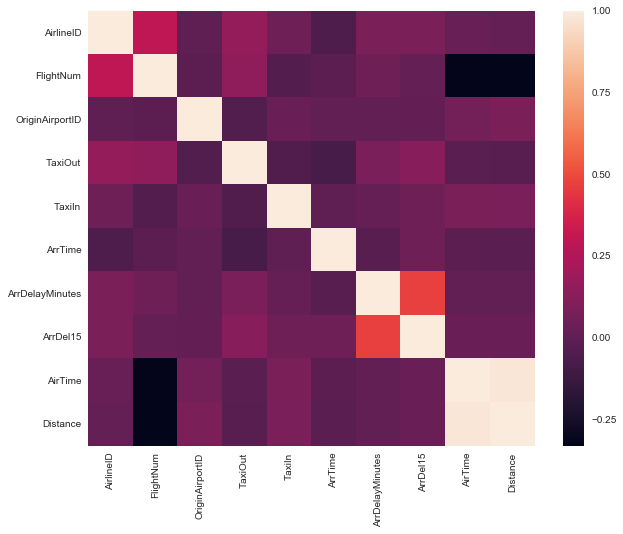

In [20]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay1.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [21]:
df_clean_for_delay1.drop(["AirTime"], axis = 1, inplace = True)


In [22]:
df_clean_for_delay1.drop(["ArrDel15"], axis = 1, inplace = True)

df_clean_for_delay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142281 entries, 2 to 445825
Data columns (total 11 columns):
AirlineID          142281 non-null int64
FlightNum          142281 non-null int64
OriginAirportID    142281 non-null int64
TaxiOut            142281 non-null float64
TaxiIn             142281 non-null float64
ArrTime            142281 non-null float64
ArrDelayMinutes    142281 non-null float64
Distance           142281 non-null float64
Month              142281 non-null object
Week               142281 non-null object
Arrival_Time       142281 non-null object
dtypes: float64(5), int64(3), object(3)
memory usage: 13.0+ MB


In [23]:
#print('uniquecarrier',len(df_clean_for_delay1.UniqueCarrier.unique()))
#print('origin',len(df_clean_for_delay1.Origin.unique()))
print('Month',len(df_clean_for_delay1.Month.unique()))
print('week',len(df_clean_for_delay1.Week.unique()))
print('Arrival_Time',len(df_clean_for_delay1.Arrival_Time.unique()))


Month 5
week 2
Arrival_Time 3


In [24]:
#df_clean_for_delay1.drop(['Origin'], axis = 1, inplace = True)


In [25]:
#df_clean_for_delay1.drop(['UniqueCarrier','Month','Week','Arrival_Time'], axis = 1, inplace = True)

indicator_var1 = pd.DataFrame()
categories = ['Month','Week','Arrival_Time']

In [26]:
for i in categories:
    x = pd.get_dummies(df_clean_for_delay1[i],drop_first=True)
    indicator_var1 = pd.concat([indicator_var1, x],axis=1)

In [27]:
df_clean_for_delay1.drop(['Month', 'Week', "Arrival_Time"], axis = 1, inplace = True)


In [28]:
final_data_delay1 = pd.concat([indicator_var1, df_clean_for_delay1],axis=1)


In [29]:
final_data_delay1.shape


(142281, 15)

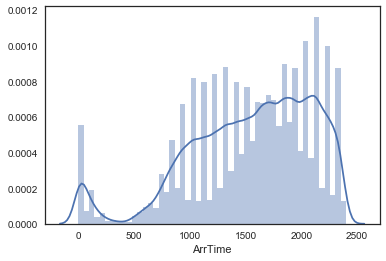

In [30]:
sns.distplot(final_data_delay1.ArrTime)

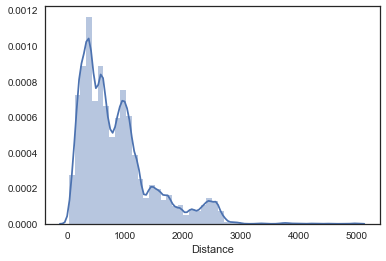

In [31]:
sns.distplot(final_data_delay1.Distance)

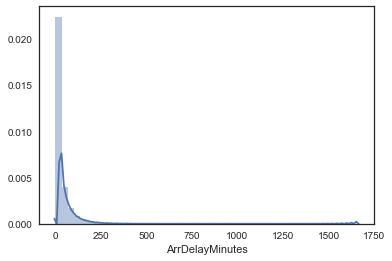

In [32]:
sns.distplot(final_data_delay1.ArrDelayMinutes)

In [33]:
final_data_delay1[np.abs(final_data_delay1.Distance-final_data_delay1.Distance.mean())<=(3*final_data_delay1.Distance.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay1=final_data_delay1[~(np.abs(final_data_delay1.Distance-final_data_delay1.Distance.mean())>(3*final_data_delay1.Distance.std()))] 

In [34]:
final_data_delay1[np.abs(final_data_delay1.TaxiIn-final_data_delay1.TaxiIn.mean())<=(3*final_data_delay1.TaxiIn.std())] 
final_data_delay1=final_data_delay1[~(np.abs(final_data_delay1.TaxiIn-final_data_delay1.TaxiIn.mean())>(3*final_data_delay1.TaxiIn.std()))] 

In [35]:
final_data_delay1[np.abs(final_data_delay1.TaxiOut-final_data_delay1.TaxiOut.mean())<=(3*final_data_delay1.TaxiOut.std())]
final_data_delay1=final_data_delay1[~(np.abs(final_data_delay1.TaxiOut-final_data_delay1.TaxiOut.mean())>(3*final_data_delay1.TaxiOut.std()))] 

In [36]:

final_data_delay1[np.abs(final_data_delay1.FlightNum-final_data_delay1.FlightNum.mean())<=(3*final_data_delay1.FlightNum.std())]
final_data_delay1=final_data_delay1[~(np.abs(final_data_delay1.FlightNum-final_data_delay1.FlightNum.mean())>(3*final_data_delay1.FlightNum.std()))] 

In [37]:
final_data_delay1.shape

(136051, 15)

In [38]:
features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [39]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
#X_pca = pd.DataFrame(pca.fit_transform(final_data_delay1[features]))
features

['weekII',
 'weekIII',
 'weekIV',
 'weekV',
 'Weekend',
 'Evening',
 'Morning',
 'AirlineID',
 'FlightNum',
 'OriginAirportID',
 'TaxiOut',
 'TaxiIn',
 'ArrTime',
 'Distance']

In [40]:
import statsmodels.api as sm

X=final_data_delay1[features]
y=final_data_delay1['ArrDelayMinutes']
X1=sm.add_constant(X)

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, train_size=0.85, random_state=0)



In [44]:

model = sm.OLS(y_train, X_train)
result=model.fit()
predictions = result.predict(X_test)
print(result.summary())

from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predictions))
mae=mean_absolute_error(y_test, predictions)
print(rms)
print(mae)

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     99.17
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          3.01e-286
Time:                        15:44:13   Log-Likelihood:            -6.2747e+05
No. Observations:              115643   AIC:                         1.255e+06
Df Residuals:                  115628   BIC:                         1.255e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -202.1068      8.651    -

In [45]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
#def vif_calc(input_data,dep_col):
#    import statsmodels.formula.api as smf
 #   x_vars=input_data.drop([dep_col],axis=1)
  #  xvar_names=x_vars.columns
   # for i in range(0,xvar_names.shape[0]):
    #    y=x_vars[xvar_names[i]]
     #   x=x_vars[xvar_names.drop(xvar_names[i])]
      #  rsq=smf.ols(formula="y~x",data=x_vars).fit().rsquared
       # vif=round(1/(1-rsq),2)
        #print(xvar_names[i],"vif :",vif)

In [47]:
#vif_calc(input_data=final_data_delay1,dep_col="ArrDelayMinutes")

In [48]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [49]:
vif.round(1)


,VIF Factor,features
0,1.9,weekII
1,2.0,weekIII
2,1.8,weekIV
3,1.3,weekV
4,1.5,Weekend
5,3.8,Evening
6,2.2,Morning
7,97.9,AirlineID
8,2.8,FlightNum
9,70.8,OriginAirportID


In [50]:
final_data_delay1.drop(['AirlineID'], axis = 1, inplace = True)


In [51]:
features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [52]:
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.85, random_state=0)


In [53]:
model = sm.OLS(y_train1, X_train1)
result=model.fit()
predictions = result.predict(X_test1)
print(result.summary())

from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test1, predictions))
mae=mean_absolute_error(y_test1, predictions)
print(rms)
print(mae)

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2883.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:35   Log-Likelihood:            -6.2796e+05
No. Observations:              115643   AIC:                         1.256e+06
Df Residuals:                  115630   BIC:                         1.256e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
weekII              1.9024      0.458     

In [54]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)


,VIF Factor,features
0,1.9,weekII
1,1.9,weekIII
2,1.7,weekIV
3,1.3,weekV
4,1.5,Weekend
5,3.8,Evening
6,2.0,Morning
7,2.7,FlightNum
8,20.6,OriginAirportID
9,4.7,TaxiOut


In [55]:
final_data_delay1.drop(['ArrTime'], axis = 1, inplace = True)


In [56]:
features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [57]:
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.85, random_state=0)

In [58]:
model = sm.OLS(y_train1, X_train1)
result=model.fit()
predictions = result.predict(X_test1)
print(result.summary())

from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test1, predictions))
mae=mean_absolute_error(y_test1, predictions)
print(rms)
print(mae)

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     3116.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:43   Log-Likelihood:            -6.2799e+05
No. Observations:              115643   AIC:                         1.256e+06
Df Residuals:                  115631   BIC:                         1.256e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
weekII              1.6055      0.456     

In [59]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)

,VIF Factor,features
0,1.9,weekII
1,1.9,weekIII
2,1.7,weekIV
3,1.3,weekV
4,1.5,Weekend
5,3.3,Evening
6,1.9,Morning
7,2.7,FlightNum
8,14.6,OriginAirportID
9,4.6,TaxiOut


In [60]:
final_data_delay1.drop(['OriginAirportID'], axis = 1, inplace = True)

features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.85, random_state=0)

vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)

,VIF Factor,features
0,1.7,weekII
1,1.7,weekIII
2,1.6,weekIV
3,1.2,weekV
4,1.4,Weekend
5,2.8,Evening
6,1.8,Morning
7,2.4,FlightNum
8,4.1,TaxiOut
9,3.1,TaxiIn


In [61]:
#final_data_delay1.drop(['FlightNum'], axis = 1, inplace = True)

#features = []
#for i in final_data_delay1.columns:
 #   if i != "ArrDelayMinutes":
  #      features.append(i)
        
#X1=final_data_delay1[features]
#y1=final_data_delay1['ArrDelayMinutes']
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.70, random_state=0)

#vif1 = pd.DataFrame()
#vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
#vif1["features"] = X1.columns
#vif1.round(1)

In [62]:
import statsmodels.api as sm
model = sm.OLS(y_train1, X_train1)
result=model.fit()
predictions = result.predict(X_test1)
print(result.summary())

from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test1, predictions))
mae=mean_absolute_error(y_test1, predictions)
print(rms)
print(mae)


                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3259.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:51   Log-Likelihood:            -6.2857e+05
No. Observations:              115643   AIC:                         1.257e+06
Df Residuals:                  115632   BIC:                         1.257e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weekII         6.3620      0.437     14.558      0.0

In [63]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X1)
normalizedXtrain = scaler.transform(X_train1)
normalizedXtest = scaler.transform(X_test1)

model = sm.OLS(y_train1, normalizedXtrain)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     3324.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:52   Log-Likelihood:            -6.2831e+05
No. Observations:              115643   AIC:                         1.257e+06
Df Residuals:                  115632   BIC:                         1.257e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2762.1509    462.076     -5.978      0.0

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train1)
X_poly_test = poly.fit_transform(X_test1)

lm = LinearRegression(normalize=True)
model = lm.fit(X_poly_train,y_train1)
predictions = lm.predict(X_poly_test)
#print(predictions)[0:5]
print(lm.score(X_poly_train,y_train1))
mae=mean_absolute_error(y_test1, predictions)
print(mae)



0.0141357535288
28.9154386427


In [65]:
X=final_data_delay1[['Distance','TaxiOut','TaxiIn','FlightNum','Weekend','weekIII','weekIV']]
y=final_data_delay1['ArrDelayMinutes']
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)
lm = LinearRegression(normalize=True)
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#print(predictions)[0:5]
print(lm.score(X_train,y_train))
mae=mean_absolute_error(y_test, predictions)
print(mae)



0.009026178078
29.1518728104


In [66]:
###ridge reggression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train1, y_train1) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
predictions=clf.predict(X_test1)
mae=mean_absolute_error(y_test1, predictions)
print(mae)
print(clf.score(X_train1,y_train1))



29.1861540377
0.00414351612911


In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train1, y_train1)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [68]:
predictions = rf.predict(X_test1)
errors = abs(predictions - y_test1)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test1)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 30.71 degrees.
Accuracy: -371.67 %.


In [69]:
signi_features = list(zip(features, rf.feature_importances_))
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort_values(["importance"], ascending = False, inplace = True)
signi_features[:30]

,features,importance
7,FlightNum,0.317881
10,Distance,0.234054
8,TaxiOut,0.167983
9,TaxiIn,0.145011
4,Weekend,0.027085
1,weekIII,0.026413
2,weekIV,0.023812
0,weekII,0.018607
3,weekV,0.016638
6,Morning,0.013614


In [70]:
X=final_data_delay1[['Distance','TaxiOut','TaxiIn','FlightNum','Weekend','weekIII','weekIV','Morning','weekV','weekII']]
y=final_data_delay1['ArrDelayMinutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)
model = sm.OLS(y_train, X_train)
result=model.fit()
predictions = result.predict(X_test)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3505.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:47:32   Log-Likelihood:            -6.2888e+05
No. Observations:              115643   AIC:                         1.258e+06
Df Residuals:                  115633   BIC:                         1.258e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.0081      0.000     31.118      0.0

In [34]:
####################according to paper
flights['Origin'].unique()

array(['DFW', 'DTW', 'SEA', 'JFK', 'SJC', 'ORD', 'PHX', 'STL', 'LAX',
       'MCO', 'DEN', 'MIA', 'KOA', 'IAH', 'AUS', 'LAS', 'SLC', 'TUS',
       'STT', 'BOS', 'FLL', 'SFO', 'OGG', 'TPA', 'SNA', 'OKC', 'HNL',
       'PHL', 'LGA', 'RDU', 'DCA', 'RIC', 'ATL', 'LBB', 'CLT', 'ELP',
       'SAN', 'BNA', 'JAC', 'SMF', 'EWR', 'IAD', 'LIH', 'SJU', 'ABQ',
       'ORF', 'JAX', 'MSY', 'SAT', 'MCI', 'GUC', 'IND', 'PDX', 'BWI',
       'MSP', 'MKE', 'TUL', 'ONT', 'RSW', 'RNO', 'DSM', 'MFE', 'PSP',
       'OMA', 'EGE', 'PBI', 'SDF', 'PIT', 'FAT', 'DAY', 'STX', 'COS',
       'CMH', 'MTJ', 'HDN', 'BDL', 'MEM', 'CLE', 'HOU', 'BOI', 'OAK',
       'GEG', 'ANC', 'BUF', 'SYR', 'ALB', 'PVD', 'ROC', 'ILM', 'ICT',
       'PWM', 'GSO', 'CHS', 'MDT', 'BHM', 'ADQ', 'BET', 'BRW', 'SCC',
       'FAI', 'JNU', 'KTN', 'YAK', 'CDV', 'SIT', 'PSG', 'WRG', 'OME',
       'OTZ', 'BUR', 'BLI', 'ADK', 'SWF', 'LGB', 'PSE', 'BQN', 'HPN',
       'SAV', 'SRQ', 'BTV', 'ORH', 'DAB', 'CVG', 'BIS', 'AVL', 'GRR',
       'FNT', 'MYR',

In [35]:
dfw=pd.DataFrame()
dfw = flights[flights['Dest'] == 'DTW']
dfw.shape

(9251, 53)

In [36]:
df_clean_for_delay2 = dfw.drop(['FlightDate', 'Carrier', 'TailNum', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Departure_Time','Origin','UniqueCarrier'], axis = 1)

In [38]:
final_data_delay2[np.abs(final_data_delay2.Distance-final_data_delay2.Distance.mean())<=(3*final_data_delay2.Distance.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.Distance-final_data_delay2.Distance.mean())>(3*final_data_delay2.Distance.std()))] 

In [39]:
final_data_delay2[np.abs(final_data_delay2.TaxiOut-final_data_delay2.TaxiOut.mean())<=(3*final_data_delay2.TaxiOut.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.TaxiOut-final_data_delay2.TaxiOut.mean())>(3*final_data_delay2.TaxiOut.std()))] 

In [40]:
final_data_delay2[np.abs(final_data_delay2.TaxiIn-final_data_delay2.TaxiIn.mean())<=(3*final_data_delay2.TaxiIn.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.TaxiIn-final_data_delay2.TaxiIn.mean())>(3*final_data_delay2.TaxiIn.std()))] 

In [41]:
final_data_delay2[np.abs(final_data_delay2.AirlineID-final_data_delay2.AirlineID.mean())<=(3*final_data_delay2.AirlineID.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.AirlineID-final_data_delay2.AirlineID.mean())>(3*final_data_delay2.AirlineID.std()))] 

In [42]:
final_data_delay2[np.abs(final_data_delay2.weekII-final_data_delay2.weekII.mean())<=(3*final_data_delay2.weekII.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.weekII-final_data_delay2.weekII.mean())>(3*final_data_delay2.weekII.std()))] 

In [43]:
final_data_delay2[np.abs(final_data_delay2.weekIII-final_data_delay2.weekIII.mean())<=(3*final_data_delay2.weekIII.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.weekIII-final_data_delay2.weekIII.mean())>(3*final_data_delay2.weekIII.std()))] 

In [44]:
final_data_delay2[np.abs(final_data_delay2.weekIV-final_data_delay2.weekIV.mean())<=(3*final_data_delay2.weekIV.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.weekIV-final_data_delay2.weekIV.mean())>(3*final_data_delay2.weekIV.std()))] 


final_data_delay2[np.abs(final_data_delay2.weekV-final_data_delay2.weekV.mean())<=(3*final_data_delay2.weekV.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.weekV-final_data_delay2.weekV.mean())>(3*final_data_delay2.weekV.std()))] 

final_data_delay2[np.abs(final_data_delay2.Weekend-final_data_delay2.Weekend.mean())<=(3*final_data_delay2.Weekend.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.Weekend-final_data_delay2.Weekend.mean())>(3*final_data_delay2.Weekend.std()))] 


final_data_delay2[np.abs(final_data_delay2.Evening-final_data_delay2.Evening.mean())<=(3*final_data_delay2.Evening.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.Evening-final_data_delay2.Evening.mean())>(3*final_data_delay2.Evening.std()))] 

final_data_delay2[np.abs(final_data_delay2.Morning-final_data_delay2.Morning.mean())<=(3*final_data_delay2.Morning.std())] #keep only the ones that are within +3 to -3 standard deviations i
final_data_delay2=final_data_delay2[~(np.abs(final_data_delay2.Morning-final_data_delay2.Morning.mean())>(3*final_data_delay2.Morning.std()))] 

In [ ]:
# 'weekII',
#  'weekIII',
#  'weekIV',
#  'weekV',
#  'Weekend',
#  'Evening',
#  'Morning',
#  'AirlineID',
#  'FlightNum',
#  'OriginAirportID',
#  'TaxiOut',
#  'TaxiIn',
#  'ArrTime',
#  'Distance'

                 AirlineID  FlightNum  OriginAirportID   TaxiOut    TaxiIn  \
AirlineID         1.000000   0.580712        -0.032472  0.053612  0.075211   
FlightNum         0.580712   1.000000        -0.103196  0.133884 -0.098217   
OriginAirportID  -0.032472  -0.103196         1.000000 -0.020854  0.048877   
TaxiOut           0.053612   0.133884        -0.020854  1.000000 -0.020699   
TaxiIn            0.075211  -0.098217         0.048877 -0.020699  1.000000   
ArrTime          -0.108327  -0.088748         0.032959 -0.073127  0.005980   
ArrDelayMinutes   0.078052   0.061632        -0.010535  0.187374  0.090145   
ArrDel15          0.084263   0.027991        -0.010153  0.285888  0.148107   
AirTime          -0.217482  -0.447528         0.286615 -0.063623  0.036381   
Distance         -0.227125  -0.445759         0.303149 -0.060929  0.046318   

                  ArrTime  ArrDelayMinutes  ArrDel15   AirTime  Distance  
AirlineID       -0.108327         0.078052  0.084263 -0.217482 -0.

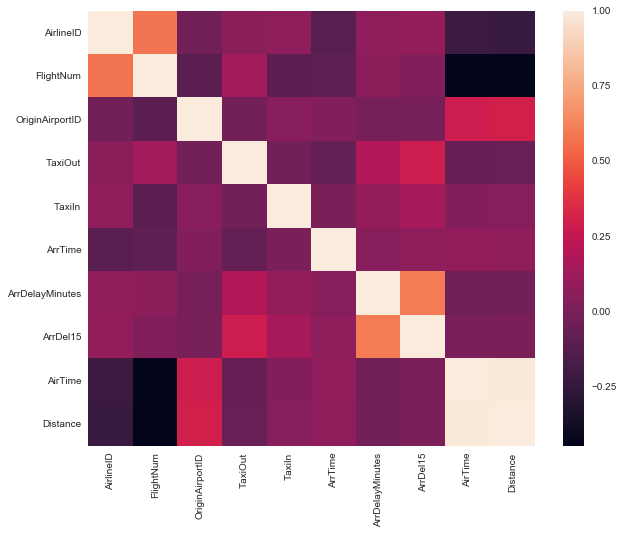

In [45]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay2.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [46]:
df_clean_for_delay2.drop(["AirTime"], axis = 1, inplace = True)
df_clean_for_delay2.drop(["ArrDel15"], axis = 1, inplace = True)


In [47]:
#print('uniquecarrier',len(df_clean_for_delay1.UniqueCarrier.unique()))
#print('origin',len(df_clean_for_delay1.Origin.unique()))
print('Month',len(df_clean_for_delay2.Month.unique()))
print('week',len(df_clean_for_delay2.Week.unique()))
print('Arrival_Time',len(df_clean_for_delay2.Arrival_Time.unique()))


Month 5
week 2
Arrival_Time 3


In [48]:
indicator_var1 = pd.DataFrame()
categories = ['Month','Week','Arrival_Time']

In [49]:
for i in categories:
    x = pd.get_dummies(df_clean_for_delay2[i],drop_first=True)
    indicator_var1 = pd.concat([indicator_var1, x],axis=1)

In [50]:
df_clean_for_delay2.drop(['Month', 'Week', "Arrival_Time"], axis = 1, inplace = True)
final_data_delay2 = pd.concat([indicator_var1, df_clean_for_delay2],axis=1)
final_data_delay2.shape


(9251, 15)

In [51]:
features = []
for i in final_data_delay2.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [52]:
X=final_data_delay2[features]
y=final_data_delay2['ArrDelayMinutes']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)



In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)

In [55]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())
mae=mean_absolute_error(y_test, predictions)
print(mae)
mse=mean_squared_error(y_test, predictions)
print(mse)

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     31.97
Date:                Thu, 10 May 2018   Prob (F-statistic):           1.32e-83
Time:                        16:59:01   Log-Likelihood:                -33375.
No. Observations:                6475   AIC:                         6.678e+04
Df Residuals:                    6461   BIC:                         6.687e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.6853      0.660      7.100      0.0

In [56]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)


,VIF Factor,features
0,2.1,weekII
1,2.0,weekIII
2,2.0,weekIV
3,1.4,weekV
4,1.4,Weekend
5,3.4,Evening
6,2.9,Morning
7,105.2,AirlineID
8,3.7,FlightNum
9,79.1,OriginAirportID


In [ ]:
final_data_delay2.drop(['AirlineID'], axis = 1, inplace = True)


In [ ]:
features = []
for i in final_data_delay2.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
X=final_data_delay2[features]
y=final_data_delay2['ArrDelayMinutes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)


        

In [34]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())

mae=mean_absolute_error(y_test, predictions)
print(mae)
mse=mean_squared_error(y_test, predictions)
print(mse)

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     41.66
Date:                Tue, 08 May 2018   Prob (F-statistic):           3.74e-97
Time:                        10:26:08   Log-Likelihood:                -54270.
No. Observations:               11417   AIC:                         1.086e+05
Df Residuals:                   11405   BIC:                         1.087e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5309      0.327     -1.625      0.1

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,1.5,weekII
1,1.5,weekIII
2,1.5,weekIV
3,1.3,weekV
4,1.0,Weekend
5,2.0,Evening
6,1.7,Morning
7,1.1,FlightNum
8,37.4,OriginAirportID
9,1.0,TaxiOut


In [36]:
final_data_delay2.drop(['ArrTime'], axis = 1, inplace = True)
features = []
for i in final_data_delay2.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
X=final_data_delay2[features]
y=final_data_delay2['ArrDelayMinutes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)


        

In [37]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)
model_ols=sm.OLS(y,X)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())

mae=mean_absolute_error(y_test, predictions)
print(mae)
mse=mean_squared_error(y_test, predictions)
print(mse)

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 08 May 2018   Prob (F-statistic):          6.46e-110
Time:                        10:26:24   Log-Likelihood:                -65811.
No. Observations:               13863   AIC:                         1.316e+05
Df Residuals:                   13852   BIC:                         1.317e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6531      0.295     -2.216      0.0

In [40]:
######random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
predictions = rf.predict(X_test)
mae=mean_absolute_error(y_test, predictions)
print(mae)
mse=mean_squared_error(y_test, predictions)
print(mse)

Mean Absolute Error: 14.35 degrees.
Accuracy: -inf %.


In [44]:
##############using hyper parameter tuning#########3
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
X=ss.fit_transform(X)
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X,y)
mse = mean_squared_error(y_test, grid.predict(X_test))
print(mse)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

934.951726431
0.037460152637791004
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'max_depth': [8], 'min_samples_split': [500],'learning_rate': [0.1], 'loss': ['ls','lad', 'huber', 'quantile'], 'min_samples_leaf':[50], 'max_features':['sqrt','log2'], 'subsample':[0.8],'random_state':[10],'n_estimators':[100]}
clf = GradientBoostingRegressor()
grid = GridSearchCV(clf,parameters, cv=10)

grid.fit(X,y)
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

MSE: 877.3553
0.0348990236419333
{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 500, 'n_estimators': 100, 'random_state': 10, 'subsample': 0.8}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
parameters = {"n_estimators": [200],
    "max_depth": [8, None],
    'max_features':['sqrt','log2','auto'],
    "min_samples_split": [2],
    "min_samples_leaf": [3],
    "bootstrap": [True, False]}

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(model,parameters, cv=10,n_jobs=-1)
grid.fit(X_train, y_train)

mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


MSE: 942.8307
0.04803790311629217
{'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [44]:

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
parameters = {"n_estimators": [200],
    "max_depth": [8],
    'max_features':['sqrt','log2','auto'],
    "min_samples_split": [500],
    "min_samples_leaf": [50],
    "bootstrap": [True, False]}

model = ExtraTreesRegressor(random_state=42)
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)

mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

MSE: 936.3416
0.04025329215929891
{'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 500, 'n_estimators': 200}
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=8,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=50, min_samples_split=500,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=42, verbose=0, warm_start=False)


In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.
